In [1]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay


In [2]:
model = load_model("models/vgg16_no_tuningbest_model_Fold_5.keras")

In [3]:
test_gen = ImageDataGenerator(rescale=1./255)

images_to_predict = test_gen.flow_from_directory(
    "data/test",
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)

Found 1184 images belonging to 2 classes.


In [4]:
true_classes = images_to_predict.classes
class_labels = list(images_to_predict.class_indices.keys())

In [5]:
y_pred = model.predict(images_to_predict)

37/37 [==============================] - 11s 195ms/step


In [7]:
prediction = [0 if val < 0.5 else 1 for val in y_pred]

In [8]:
report = classification_report(true_classes, prediction, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   chihuahua       0.98      0.90      0.94       640
      muffin       0.89      0.98      0.93       544

    accuracy                           0.93      1184
   macro avg       0.93      0.94      0.93      1184
weighted avg       0.94      0.93      0.93      1184



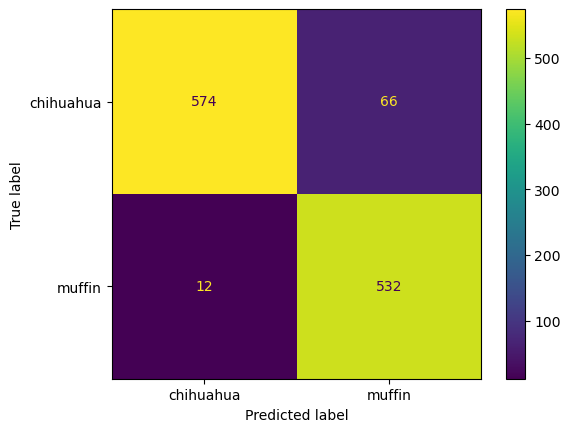

In [9]:
matrix = confusion_matrix(true_classes, prediction)

matrix_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=class_labels)

matrix_display.plot(
    include_values=True)

plt.savefig("result_testing/confusion_matrix.png")
plt.show()

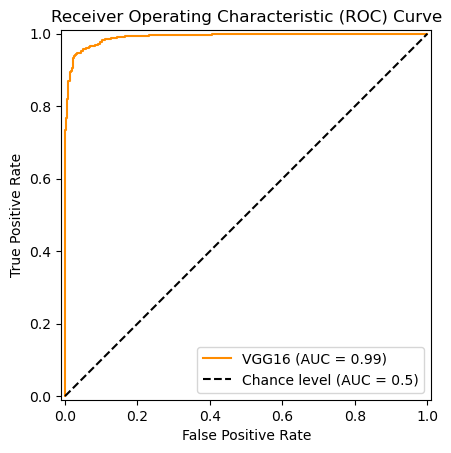

In [12]:
RocCurveDisplay.from_predictions(true_classes, y_pred, color="darkorange", plot_chance_level=True, name="VGG16")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.savefig("result_testing/roc_curve.png")
plt.show()